# PyMindMonitor

Some constants and imports.

In [111]:
DATABASE = '/Users/sb/Development/projects/PyMindMonitor/mind_monitor/resources/eeg.db'

import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

#Indices into record
idx = {'session':0, 'timestamp':1, 'highAlpha':2, 'highBeta':3, 'highGamma':4, 'delta':5, 'theta':6, 
       'lowAlpha':7, 'lowBeta':8, 'lowGamma':9,
      'attention':10, 'meditation':11, 'poorSignalQuality':12}

Create connection and a cursor.

In [112]:
conn = sqlite3.connect(DATABASE)
cur = conn.cursor()

Retrieve a set of raw data.

In [113]:
# Set session id for evaluation:
session_id = 11

In [114]:
cur.execute('select * from raw_data where session=? order by timestamp', (session_id,))
raw_data = cur.fetchall()
#raw_data

In [115]:
t_base = None
if len(raw_data) > 0:
    t_base = raw_data[0][1]
    t_data = [x[1] - t_base for x in raw_data]
    r_data = [x[2] for x in raw_data]
    fig = plt.figure(figsize=(15,6))
    spl = fig.add_subplot(111, 
                          xlabel = 'time [sec]', 
                          ylabel = 'raw data', 
                          title = 'raw data for session {}'.format(session_id))
    spl.plot(t_data, r_data)
    plt.show()

Retrieve set of records.

In [116]:
cur.execute('select * from records where session=? order by timestamp', (session_id,))
records = cur.fetchall()
#records

In [117]:
import monitor_sqlite as msq
import monitor_plot as mpl

In [118]:
mdb = msq.SQLiteDB()
data = mdb.retrieve_data(session_id)

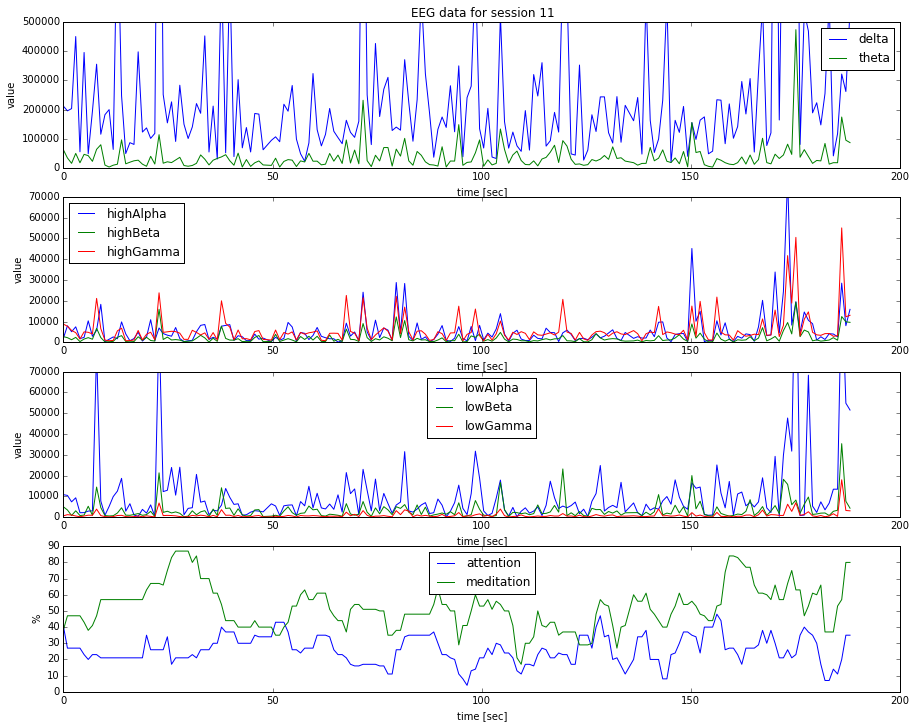

In [119]:
mpl.plot_records(data, t_base)

Close connection.

In [120]:
#conn.close()